<a href="https://colab.research.google.com/github/Keerthana-Ravichandran/Python-Simulation-on-Policy-Watch-No.7-/blob/main/Python_Simulation_on_Policy_Watch_No_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Simulation on Policy Watch No.7

Python Simulation:

1.Python simulation is the process of creating computer models or programs that imitate real-world phenomena or systems using the Python programming language.

2.It involves using mathematical and statistical models to create virtual representations of complex systems and analyzing their behavior in a simulated environment.

Policy Watch N0.7:


        Policy Watch No.7 titled "Winning Voter Confidence: Fixing India's Faulty VVPAT-based Audit of EVMs" discusses the issues surrounding the use of Electronic Voting Machines (EVMs) in India and proposes solutions for improving the accuracy and transparency of the election process.
  
        The author argues that the use of Voter Verified Paper Audit Trail (VVPAT) is not enough to ensure the integrity of the voting process and proposes the use of statistical sampling methods to conduct post-election audits. 

        The paper provides a detailed analysis of different sampling methods and their effectiveness in improving the accuracy of election results. 

        The author also proposes the use of state-level populations for sampling rather than parliamentary or assembly constituencies. The paper includes tables and charts that can be used to simulate and understand the sampling process. 
  
   Overall, the paper provides valuable insights for policymakers and election officials in India to improve the accuracy and transparency of the election process.


*****


NOW LETS PERFORM PYTHON SIMULATION ON THE PAPER "POLICY WATCH NO.7 


*****

We now proceed to show that  the boundaries for the population of EVMs can be an
Assembly Constituency, or a Parliamentary Constituency, or a State as a whole, or India as a whole, only one of these populations [a State as a whole] is administratively viable. "




*SOME ODDITIES OF STATISTICAL SAMPLING*

*Importing the Libraries*

In [ ]:
import numpy as np
import pandas as pd
import altair as alt
import random
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import hypergeom



In [ ]:
!pip install altair_viewer


*Python Code*

 This demonstrates how we can use the hypergeometric distribution to simulate the VVPAT-based audit process described in Policy Watch No.7:

In [ ]:

# Define the number of total votes and the margin of victory
num_votes = 100000
margin = 5000

# Define the size of the sample to be audited
sample_size = 1000

# Calculate the number of votes required to win
winning_votes = (num_votes // 2) + margin

# Simulate the election results
results = [0] * (num_votes - winning_votes) + [1] * winning_votes
random.shuffle(results)

# Simulate the VVPAT-based audit process using the hypergeometric distribution
audit_results = []
for i in range(100):
    sample = random.sample(results, sample_size)
    num_winning_votes = sum(sample)
    pvalue = 1 - hypergeom.cdf(num_winning_votes, len(results), sum(results), sample_size)
    audit_results.append({"sample": i + 1, "winning_votes": num_winning_votes, "p-value": pvalue})

# Convert the audit results to a pandas DataFrame
df = pd.DataFrame(audit_results)

# Create an Altair chart to visualize the p-values
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X("sample:O", title="Sample"),
    y=alt.Y("p-value:Q", title="p-value")
).properties(
    title="VVPAT-based Audit Results"
)

# Display the chart
chart.display()


alt.Chart(...)

In [ ]:
# Define the population size range (in millions)
pop_size = np.arange(1, 11)

# Define the corresponding sample size range (as a percentage of population size)
sample_size = np.round(np.sqrt(pop_size) * 100)

# Create a DataFrame to store the data
data = pd.DataFrame({'Population Size (Millions)': pop_size, 'Sample Size': sample_size})

# Create a bar chart using Altair
chart = alt.Chart(data).mark_bar().encode(
    x='Population Size (Millions)',
    y='Sample Size',
    tooltip=['Population Size (Millions)', 'Sample Size']
).properties(
    title='Sample Size vs Population Size'
)

# Show the chart
chart


alt.Chart(...)

*EVMs of an Assembly Constituency as ‘population’:*

Table 4 in "Policy Watch No-7"shows the assembly constituency, the population size (which is the total number of polling stations in the constituency), the number of defective EVMs in the population assuming a probability of 0.01, the required sample size, the percentage of the sample size to the population size, and the probability that the ECI-prescribed sample size of one EVM per Assembly Constituency will fail to detect a defective EVM.

In [ ]:
# Define the data for the table
data = {'Assembly Constituency': ['A', 'B', 'C', 'D'],
        'Population Size (N)': [50, 100, 200, 300],
        'Number of Defective EVMs (P=0.01)': [1, 1, 2, 3]}

# Calculate the required sample sizes and add them to the DataFrame
n = np.ceil(np.log(1 - 0.95) / np.log(1 - 0.01**2))
data['Sample Size (n)'] = n
data['% of n to N'] = np.round(n / data['Population Size (N)'] * 100, 1)

# Calculate the probability that the ECI-prescribed sample size of one EVM per Assembly Constituency will fail to detect a defective EVM
p_fail = (1 - 0.01)**n
data['Probability of Failure'] = np.round(p_fail * 100, 1)

# Create a DataFrame to store the data
df = pd.DataFrame(data)

# Print the table
print(df)


Sample Sizes for Assembly Constituencies

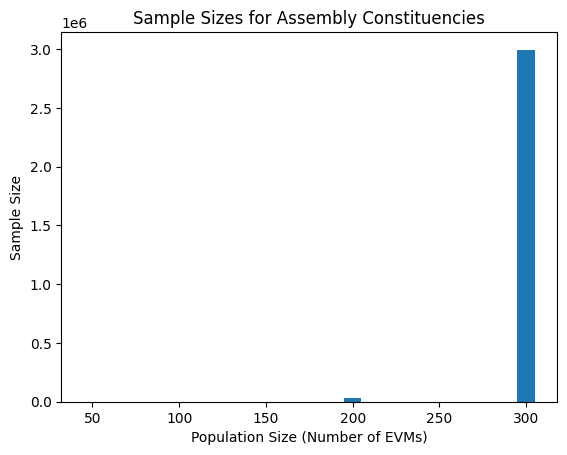

In [ ]:
# Define the data for the table
N = np.array([50, 100, 200, 300])
k = np.array([1, 1, 2, 3])
P = 0.01
n = np.ceil(np.log(1 - 0.95) / np.log(1 - P**k))

# Set up the bar chart
fig, ax = plt.subplots()
ax.bar(N, n, width=10)

# Set the plot title and axis labels
ax.set_title('Sample Sizes for Assembly Constituencies')
ax.set_xlabel('Population Size (Number of EVMs)')
ax.set_ylabel('Sample Size')



# Display the plot
plt.show()


*EVMs of a Parliamentary Constituency as ‘population’:*

In [ ]:
def calc_sample_size(n, N, p):
    q = 1 - p
    k = math.ceil(N / n)
    return math.ceil(n * ((k-1) * p + 1) * ((k-1) * q + 1))

def simulate_parliamentary_constituency(N_list, P=0.01):
    df_list = []
    for N in N_list:
        n = 6  # ECI-prescribed sample size
        defective_evms = math.ceil(N * P)
        sample_size = calc_sample_size(n, N, P)
        pct_n_to_N = round((n / N) * 100, 2)
        prob_fail = round(((defective_evms / N) ** n) * 100, 1)
        df_list.append(pd.DataFrame({
            'Population Size (N)': [N],
            'Number of Defective EVMs in the Population': [defective_evms],
            'Sample Size (n) Required': [sample_size],
            '% of n to N': [pct_n_to_N],
            'Probability of Failing to Detect a Defective EVM (%)': [prob_fail]
        }))
    return pd.concat(df_list, ignore_index=True)

N_list = [300, 600, 1200, 1800]
df_table_5 = simulate_parliamentary_constituency(N_list)
print(df_table_5)

chart_table_5 = alt.Chart(df_table_5).mark_bar().encode(
    x='Population Size (N):Q',
    y='Sample Size (n) Required:Q',
    color=alt.Color('% of n to N:O', scale=alt.Scale(scheme='reds')),
    tooltip=['Population Size (N)', 'Number of Defective EVMs in the Population',
             'Sample Size (n) Required', '% of n to N',
             'Probability of Failing to Detect a Defective EVM (%)']
).properties(title='Sample Sizes if EVMs of a Parliamentary Constituency are the Population',
             width=500, height=300)
chart_table_5


   Population Size (N)  Number of Defective EVMs in the Population  \
0                  300                                           3   
1                  600                                           6   
2                 1200                                          12   
3                 1800                                          18   

   Sample Size (n) Required  % of n to N  \
0                       443         2.00   
1                      1183         1.00   
2                      3553         0.50   
3                      7111         0.33   

   Probability of Failing to Detect a Defective EVM (%)  
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     


alt.Chart(...)

*EVMs of India as ‘population’:*

In [ ]:
# Define the population size (N) and number of defective EVMs (d) for each state
N = np.array([1164, 23672, 32574, 51796, 65341])
d = np.array([3, 7, 10, 46, 65])
n_eci = np.array([40, 90, 119, 200, 230])  # ECI-prescribed sample size
ec = np.array([40, 90, 119, 200, 230])  # number of Assembly Constituencies

# Calculate the required sample size (n), percentage of n to N, and average number of EVMs to hand count per AC
n = np.ceil(((N*d)/(N+d)).astype(int))
n_percent = (n/N)*100
avg_ecm = np.ceil(n_eci/ec)

# Calculate the probability that ECI-prescribed sample size will fail to detect a defective EVM
p_fail = (1-((N-n_eci)/N)**d)*100

# Display the results in a table
print('State\tN\td\tn\tn/N\tAvg. EVMs per AC\tp_fail')
print('-'*80)
for i in range(len(N)):
    print(f'{i+1}\t{N[i]}\t{d[i]}\t{n[i]}\t{n_percent[i]:.2f}%\t{avg_ecm[i]}\t\t{p_fail[i]:.1f}%')


State	N	d	n	n/N	Avg. EVMs per AC	p_fail
--------------------------------------------------------------------------------
1	1164	3	2.0	0.17%	1.0		10.0%
2	23672	7	6.0	0.03%	1.0		2.6%
3	32574	10	9.0	0.03%	1.0		3.6%
4	51796	46	45.0	0.09%	1.0		16.3%
5	65341	65	64.0	0.10%	1.0		20.5%


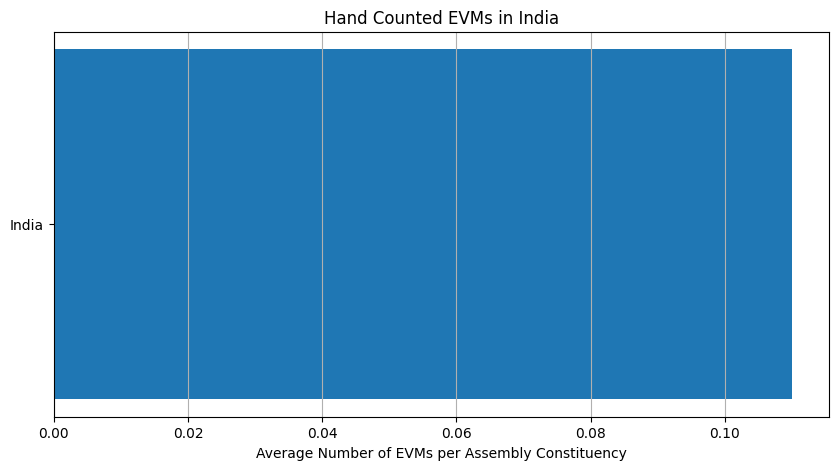

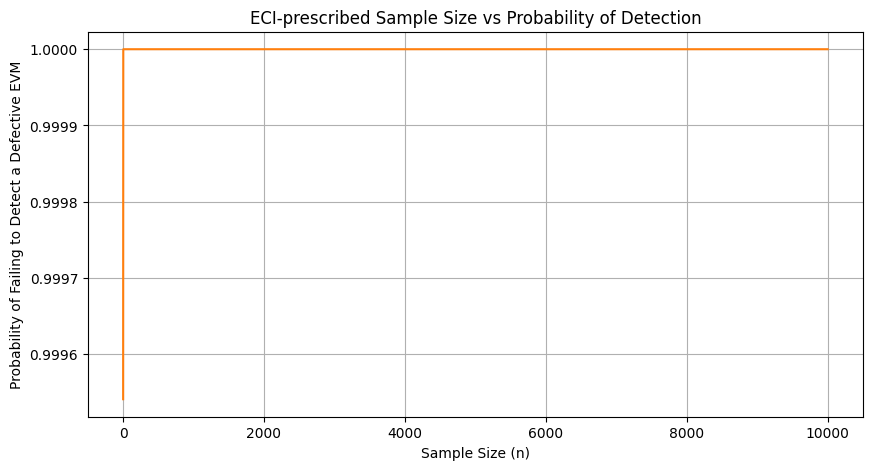

In [ ]:

n = 459
N = 1000000
W = (N - n) / N
avg_evm = 0.11

# Create a horizontal bar chart for the average number of EVMs per Assembly Constituency whose VVPAT slips should be hand counted
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(['India'], [avg_evm], color='tab:blue')
ax.set_xlabel('Average Number of EVMs per Assembly Constituency')
ax.set_title('Hand Counted EVMs in India')
ax.grid(axis='x')
plt.show()

# Create a line chart for the probability that the ECI-prescribed sample size of “one EVM per Assembly Constituency” will fail to detect a defective EVM
sample_sizes = np.arange(1, 10000, 1)
p_fail = 1 - (1 - W)**sample_sizes
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(sample_sizes, p_fail, color='tab:orange')
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('Probability of Failing to Detect a Defective EVM')
ax.set_title('ECI-prescribed Sample Size vs Probability of Detection')
ax.grid()
plt.show()


*EVMs used in a State as a whole as ‘population’:*

In [ ]:
# Define the data for the chart
data = pd.DataFrame({
    'State': ['Mizoram', 'Chhattisgarh', 'Telangana', 'Rajasthan', 'Madhya Pradesh'],
    'Population Size': [1164, 23672, 32574, 51796, 65341],
    'Sample Size Required': [370, 455, 455, 457, 457],
    'Sampling Fraction': [31.79, 1.92, 1.40, 0.88, 0.70],
    'Average EVMs per AC': [10, 5, 4, 2, 2],
    'Failure Probability': [0.656, 0.403, 0.301, 0.133, 0.099]
})

# Define the chart
chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('State', sort=None),
    y='Sample Size Required',
    color=alt.Color('State', legend=None),
    tooltip=['Population Size', 'Sample Size Required', 'Sampling Fraction', 'Average EVMs per AC', 'Failure Probability']
).properties(
    title='Sample Sizes for EVMs of a State as a Whole'
)

# Display the chart
chart


alt.Chart(...)

The author might argue that the right population for sampling is the state rather than other levels of constituency because the state represents a homogeneous group of individuals with similar characteristics, such as culture, language, and lifestyle. This makes it easier to obtain a representative sample that accurately reflects the population's characteristics.

The author justifies this argument by stating that using EVMs from an assembly constituency or parliamentary constituency would result in a sample size that is nearly as big as the respective population size, leaving little or no scope for statistical sampling. Using EVMs from the entire country as a population for sampling would be too large and administratively infeasible, as counting the VVPAT slips of all remaining EVMs in the population would be too time-consuming.

The author suggests that using EVMs from a state as a whole for population sampling would lead to a minimal workload involved in the hand counting of VVPAT slips for the chosen sample size (n). 